<a href="https://colab.research.google.com/github/JoaoSald/Processamento_digital_de_Imagens/blob/master/aula05_morfologiaMatematica_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORFOLOGIA MATEMÁTICA

In [ ]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL.Image as Image
plt.style.use("dark_background")

## Importando a imagem para erosão

valor maxido de pixel da imagem original =  255 , e valor maximo de pixel da imagem normalizada =  1.0


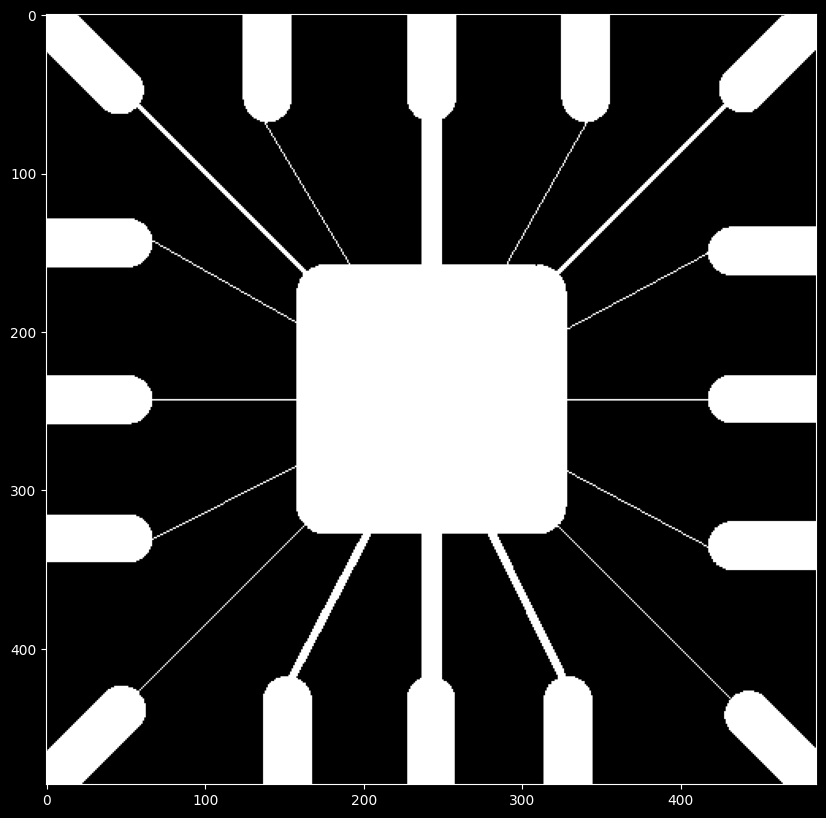

In [ ]:
# IMPORTAR A IMAGEM
img = cv2.imread('Fig0905(a).tif')
#img = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0905(a)(wirebond-mask).jpg"))

# NORMALIZAR A IMAGEM
img_n = (img - img.min())/(img.max()-img.min())

print("valor maxido de pixel da imagem original = ",img.max(), ', e valor maximo de pixel da imagem normalizada = ', img_n.max())

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="Greys");

In [ ]:
#Montando a mao o Kernel
tey = np.array([[0,1,0],[1,1,1],[0,1,0]])
print('A mão =',tey)

# função pronta do kernel
N = 10
KC= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #   Mascara em cruz
print('Função pronta= ',KC)

A mão = [[0 1 0]
 [1 1 1]
 [0 1 0]]
Função pronta=  [[0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 0]]


# EROSAO

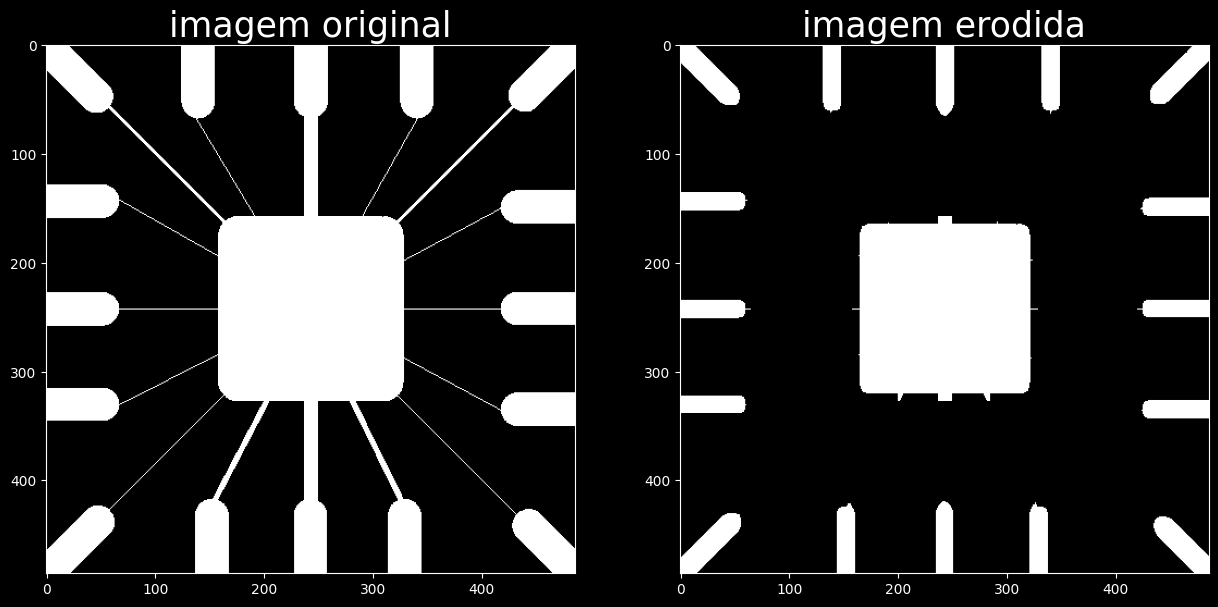

In [ ]:
# KERNEL (k)
N = 15
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KC # escolha da mascara

erode = cv2.erode(img_n, KQ)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('imagem erodida',size=25);

# DILATAÇAO

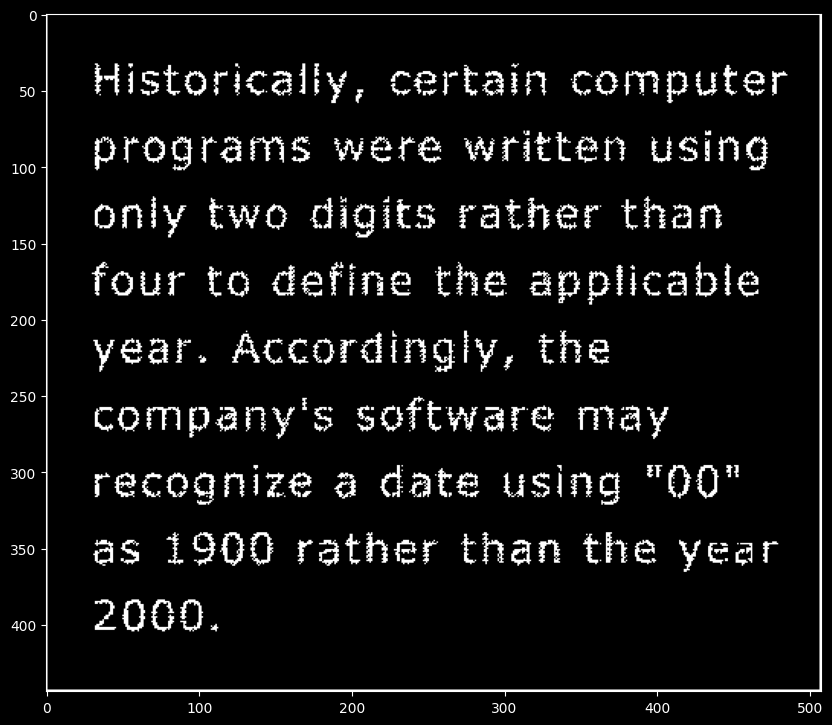

In [ ]:
# IMPORTAR A IMAGEM
img2 = cv2.imread('Fig0907(a).tif')
#img2 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0907(a)(text_gaps_1_and_2_pixels).jpg"))
# NORMALIZAR A IMAGEM
img_n2 = (img2 - img2.min())/(img2.max()-img2.min())

plt.figure(figsize=(10,10))
plt.imshow(img2, cmap="Greys");

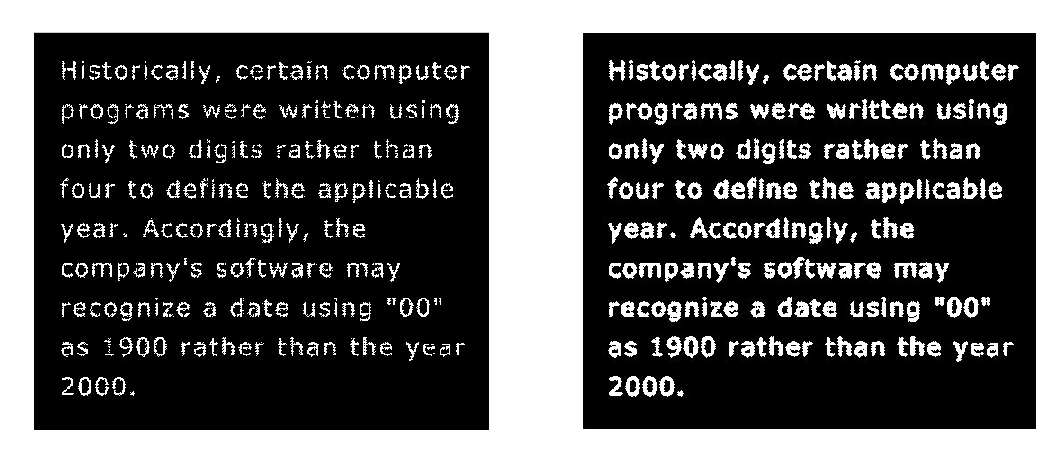

In [ ]:
# KERNEL (k)
N = 3
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KC # escolha da mascara

dilate = cv2.dilate(img_n2, KQ, iterations=1) #(lÓGICA DO HIT)

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img_n2, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('imagem dilatada',size=25);

# Bordas internas, externas e gradiente morfológico

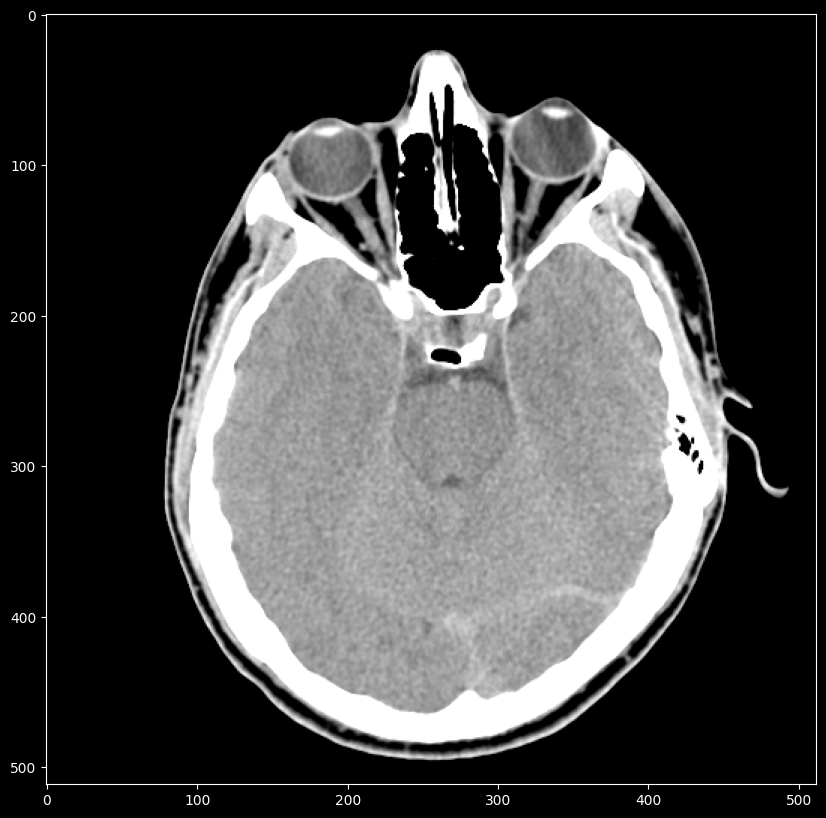

In [ ]:
# IMPORTAR A IMAGEM
img3 = cv2.imread('Fig0939(a).tif')
#img3 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0914(a)(licoln from penny).jpg"))

# NORMALIZAR A IMAGEM
img_n3 = (img3 - img3.min())/(img3.max()-img3.min())

plt.figure(figsize=(10,10))
plt.imshow(img_n3, cmap="Greys");

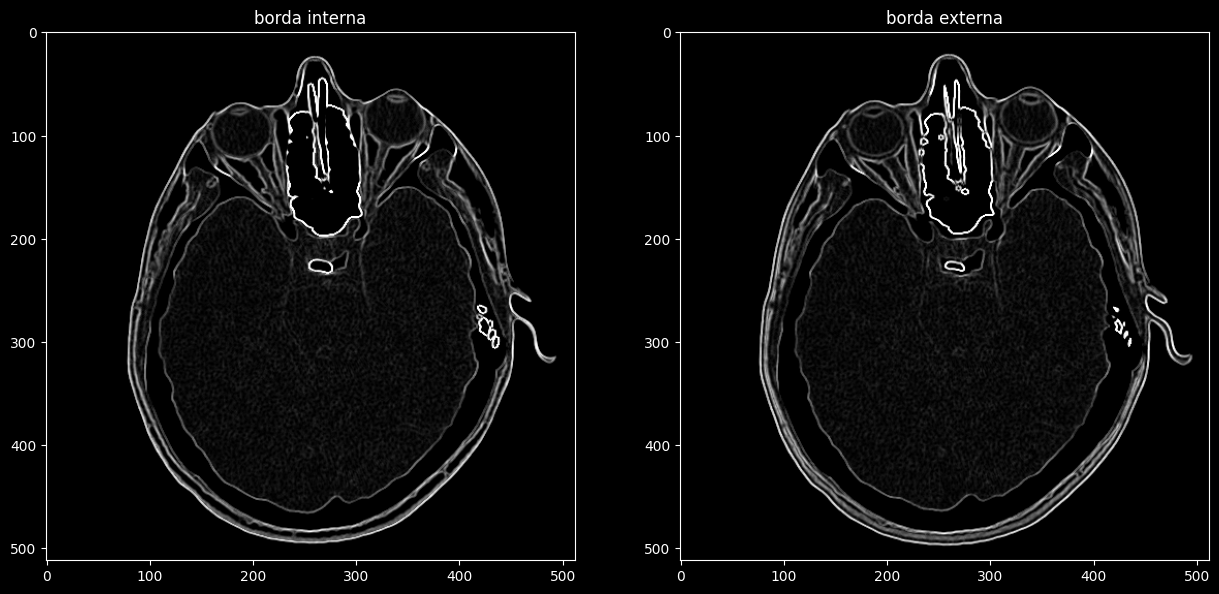

In [ ]:
# Bordas internas e Externas
# KERNEL (k)
N = 5
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

# borda interna com a funçao pronta
interna = img_n3  - cv2.erode(img_n3, KQ);


#borda externa pronta
externa = cv2.dilate(img_n3, KQ) - img_n3;

plt.figure(figsize = (15,10));
plt.subplot(1,2,1);plt.imshow(interna, cmap='gray');plt.title('borda interna');
plt.subplot(1,2,2);plt.imshow(externa, cmap='gray');plt.title('borda externa');


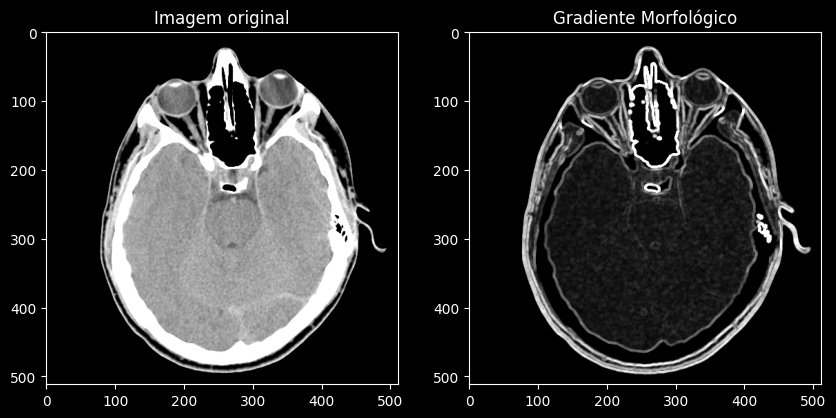

In [ ]:
# Gradiente Morfológico

gm = cv2.dilate(img_n3,KQ) - cv2.erode(img_n3,KQ);

plt.figure(figsize = (10,10));
plt.subplot(1,2,1);plt.imshow(img_n3, cmap='gray');plt.title('Imagem original');
plt.subplot(1,2,2);plt.imshow(gm, cmap='gray');plt.title('Gradiente Morfológico');